In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\amrut\OneDrive\Desktop\Coding\Real_Time_Fraud_Detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 66.0M/66.0M [00:01<00:00, 53.8MB/s]

Extracting files...


Path to dataset files: C:\Users\amrut\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [5]:
pip install pandas numpy

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----------- ---------------------------- 3.4/11.5 MB 20.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 21.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../data/creditcard.csv")

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
desc_df = df.describe().copy()

In [19]:
threshold = 1e10
desc_df[desc_df.abs()>threshold] = np.inf
desc_df = desc_df.round(2)

In [20]:
print(desc_df)

            Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86       0.00       0.00      -0.00       0.00       0.00   
std     47488.15       1.96       1.65       1.52       1.42       1.38   
min         0.00     -56.41     -72.72     -48.33      -5.68    -113.74   
25%     54201.50      -0.92      -0.60      -0.89      -0.85      -0.69   
50%     84692.00       0.02       0.06       0.18      -0.02      -0.05   
75%    139320.50       1.32       0.80       1.03       0.74       0.61   
max    172792.00       2.46      22.06       9.38      16.88      34.80   

              V6         V7         V8         V9  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00      -0.00       0.00      -0.00  ...       0.00      -0.00   
std         1.33       1.24       1.19       1.10  ...       0.74       0.73   
min 

The mean of amount is 88 usd, which means most of the transactions are small

In [22]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values

In [25]:
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


The data is highly imbalanced

<Axes: xlabel='Class', ylabel='count'>

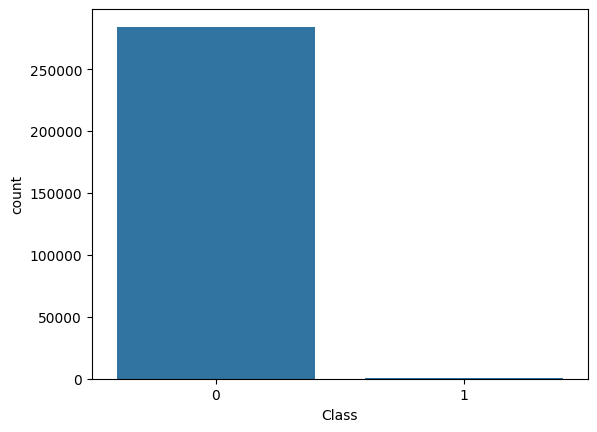

In [29]:
sns.countplot(x='Class', data=df)

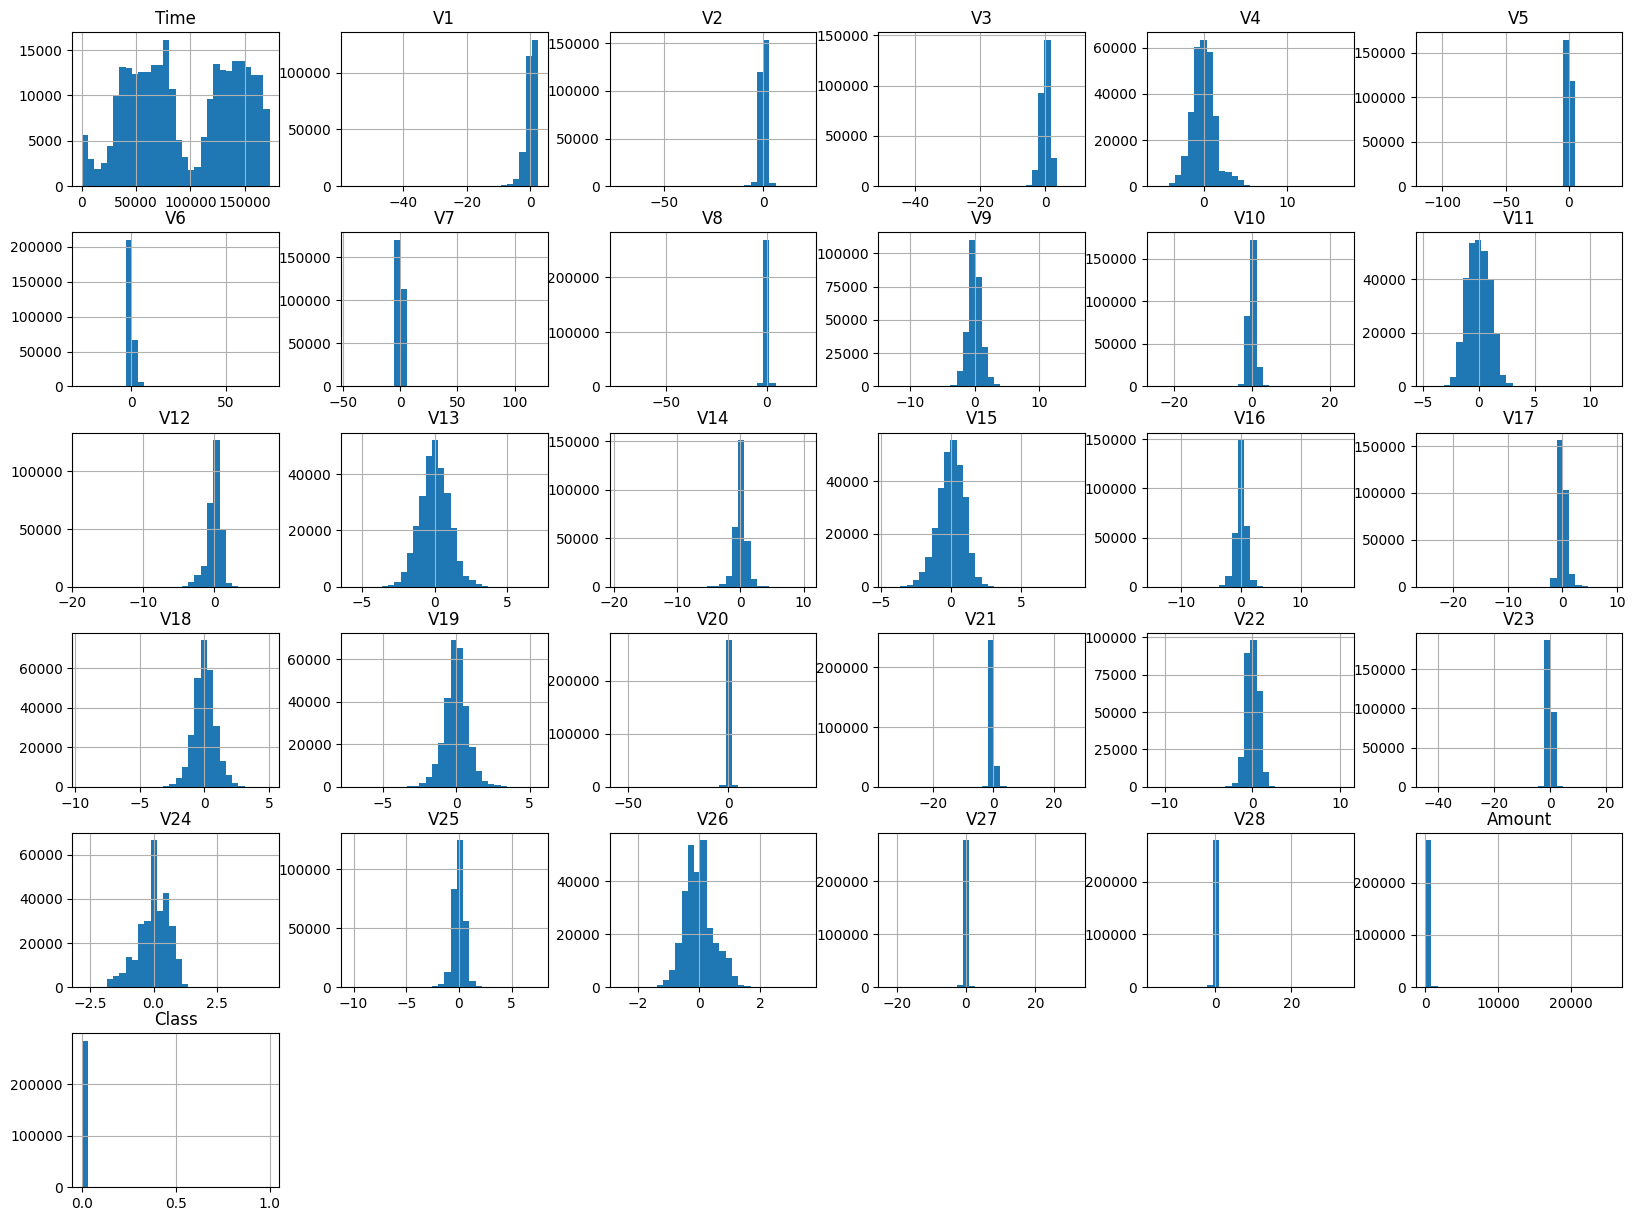

In [32]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

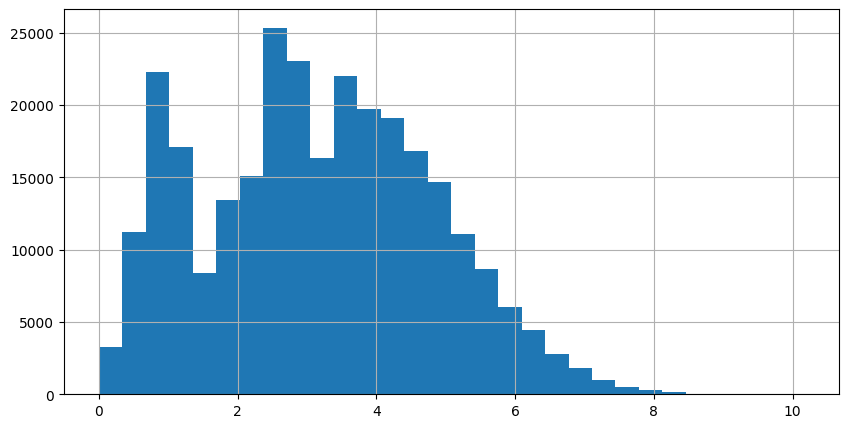

In [33]:
df['LogAmount'] = np.log1p(df['Amount'])  # log(Amount + 1) to handle zero values
df['LogAmount'].hist(figsize=(10, 5), bins=30)
plt.show()

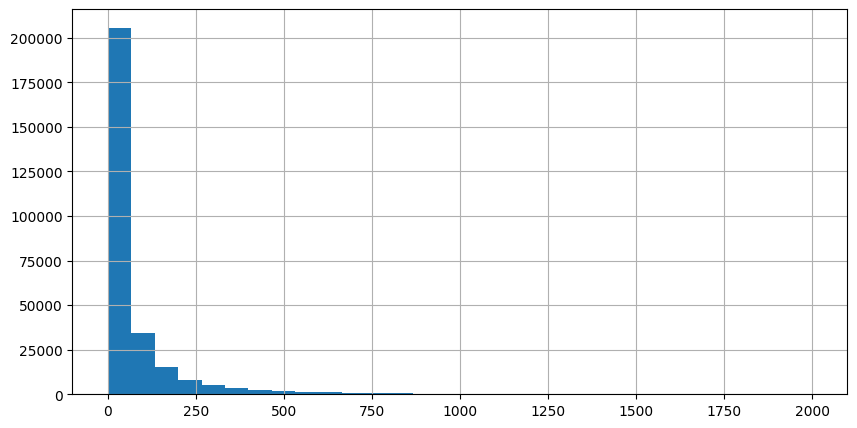

In [34]:
df[df['Amount'] < 2000]['Amount'].hist(figsize=(10, 5), bins=30)
plt.show()

<Axes: >

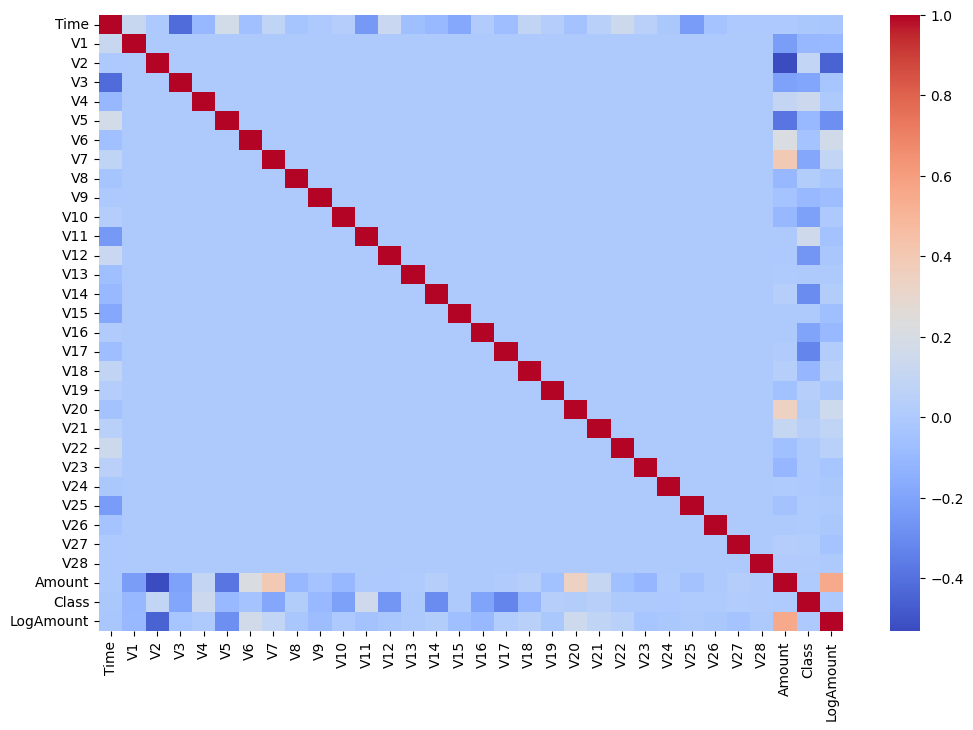

In [35]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)